#  <i style="color:green">Impact Of Internet On Students During COVID - Report </i>

## Import Needed Libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas_profiling import ProfileReport


%matplotlib inline

## Import Dataset

In [198]:
pwd = os.getcwd()
dataset = pd.read_csv(pwd + "/Official Survey Edited.csv")

In [199]:
dataset

,Timestamp,Parental_Consent,Level_Of_Study,City,Gender,Ethnicity,Technology_Usage,Fun_Increase_Decrease,Internet_Time_Fun,Why_Social_Media,...,Positive_Technology_Effects,Technology_Usage(Academic),Productive,Productive_Increase_Decrease,Academic Purpose,Parent_Tech_Usage,Technology_News,News_Source,Fake_News_Exposure,Trusted_Sources
0,2021/05/25 8:41:19 PM AST,Yes,10th grade,Queens,Female,"South-East Asian (India, Bangladesh, etc.)",About 1-3 hours a day,Increased,General Social Media;Streaming Services;Gaming...,To converse with my friends and family;To get ...,...,easier to find news/info;Meeting others with s...,10-12 hours,7,Increase,Online Classes/ Attending tutoring sessions/ r...,They feel I use technology more than I should/...,Every other day,General Social Media,The side effects that the vaccine can have. Mo...,I don't really know. If I find useful informat...
1,2021/05/25 8:43:13 PM AST,I am 18+,Undergraduate Student (1st Year),Queens,Female,"South-East Asian (India, Bangladesh, etc.)",About 4-8 hours a day,Increased,General Social Media;Streaming Services;Readin...,To make new friends;To get updates on the live...,...,connecting with friends/family;easier to find ...,1-2 hours,4,Decrease,Online Classes/ Attending tutoring sessions/ r...,Neutral,Once a week,General Social Media,Insta posts spread misinformation about the pa...,New York Times
2,2021/05/25 8:48:26 PM AST,Yes,10th grade,Queens,Male,Black or African American;South-East Asian (In...,About 4-8 hours a day,Decreased,General Social Media;Streaming Services;Messag...,To converse with my friends and family;To make...,...,connecting with friends/family;easier to find ...,3-9 hours,3,Decrease,Online Classes/ Attending tutoring sessions/ r...,They feel I use technology more than I should/...,About every day,News Channels,The idea that vaccines aren’t safe.,"The CDC, although they have been inconsistent,..."
3,2021/05/25 8:53:37 PM AST,Yes,9th grade,Queens,Female,"South-East Asian (India, Bangladesh, etc.)",About 4-8 hours a day,Increased,General Social Media;Messaging Services;Gaming...,To converse with my friends and family;To make...,...,Meeting others with same interests;Keeps you e...,1-2 hours,6,Decrease,Online Classes/ Attending tutoring sessions/ r...,They feel I use technology more than I should/...,Close to never,General Social Media,People said we didnt have to wear masks but we...,The cdc and potus accounts
4,2021/05/25 8:54:07 PM AST,Yes,10th grade,Queens,Female,"South-East Asian (India, Bangladesh, etc.)",About 4-8 hours a day,Increased,General Social Media;Messaging Services,To converse with my friends and family;To get ...,...,connecting with friends/family;easier to find ...,3-9 hours,8,Increase,Online Classes/ Attending tutoring sessions/ r...,Neutral,Every other day,News Channels,Fake Government Related Issues/Propaganda on I...,Any reliable unbiased news channels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2021/09/07 12:09:11 PM AST,I am 18+,9th grade,Long Island,Non-Binary,American Indian or Alaska Native,About 1-3 hours a day,Increased,General Social Media;Messaging Services;Gaming...,To make new friends;To get the latest news on ...,...,easier to find news/info;Keeps you entertained...,10-12 hours,7,Increase,Online Classes/ Attending tutoring sessions/ r...,They feel I use technology more than I should/...,Every other day,Newspapers (online or paper),Some news sources said that the vaccine doesn’...,"CNN, NBC"
160,2021/09/07 12:11:21 PM AST,I am 18+,9th grade,Long Island,Prefer not to say,American Indian or Alaska Native,About 1-3 hours a day,About the same,General Social Media;Messaging Services;Gaming...,To converse with my friends and family;To make...,...,Meeting others with same interests;getting sup...,1-2 hours,1,Decrease,Online Classes/ Attending tutoring sessions/ r...,Neutral,Every other day,Newspapers (online or paper),Some internet sources said that coronavirus wa...,I trust CNN a

## 2 Basic Checks (Data Preparation)

The dataset contains response from 164 respondents on the impact of internet during covid. This has 22 unique questions from 2021/05/25 to 2021/09/07 (104 days duration). The data entries are unique and have consistent formats for
analysis. For each record/row, information is complete for majority of columns. Some columns contain missing data (blank or NA cells) which is likely due to the nature of question. There's only 1 quantitative data in this dataset which is Productivity.

## 2.1 Structure of Dataset


In [200]:
rows, columns = dataset.shape
print(f"There are {columns} columns and {rows} rows")

There are 23 columns and 164 rows


In [201]:
dataset.describe()

,Productive
count,164.000000
mean,6.451220
std,2.165839
min,1.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


## 2.2 Missing Values

In [202]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     164 non-null    object
 1   Parental_Consent              164 non-null    object
 2   Level_Of_Study                164 non-null    object
 3   City                          163 non-null    object
 4   Gender                        164 non-null    object
 5   Ethnicity                     164 non-null    object
 6   Technology_Usage              164 non-null    object
 7   Fun_Increase_Decrease         164 non-null    object
 8   Internet_Time_Fun             164 non-null    object
 9   Why_Social_Media              164 non-null    object
 10  Feelings                      164 non-null    object
 11  Feeling_Issue                 164 non-null    object
 12  Negative_Technology_Effects   163 non-null    object
 13  Positive_Technology_

In [203]:
# period of dataset
dataset['Timestamp'] = dataset['Timestamp'].astype('datetime64[ns]')
dataset['Timestamp'][163] - dataset['Timestamp'][0]

/Users/dougymenns/opt/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname AST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Timedelta('104 days 17:53:22')

Fake_News_Exposure and Trusted Sources take descriptive user response. We cannot conclude the null values above.

## 2.3 Descriptive Stats Of Numeric Features


In [204]:
dataset.describe()

,Productive
count,164.000000
mean,6.451220
std,2.165839
min,1.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,10.000000


### Observations
- Average productivity is 6.4
- Min productivity is 1
- Max productivity is 10

## 2.4 Pandas Profiling Report 

In [205]:
ProfileReport(dataset)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


## 3 Exploratory Data Analysis (EDA) : Programatic

In [206]:
categorical_columns = list(dataset.columns.drop(['Timestamp','Productive','Fake_News_Exposure','Trusted_Sources']))
categorical_columns

['Parental_Consent',
 'Level_Of_Study',
 'City',
 'Gender',
 'Ethnicity',
 'Technology_Usage',
 'Fun_Increase_Decrease',
 'Internet_Time_Fun',
 'Why_Social_Media',
 'Feelings',
 'Feeling_Issue',
 'Negative_Technology_Effects',
 'Positive_Technology_Effects',
 'Technology_Usage(Academic)',
 'Productive_Increase_Decrease',
 'Academic Purpose',
 'Parent_Tech_Usage',
 'Technology_News',
 'News_Source']

## 3.1 Categorical Variables
Identify all categorical variables in the dataset and dive deep into it. Using pandas profiling will simplify all these for easy identification

from the dataset these are the categorical features ( ['Parental_Consent',
 'Level_Of_Study',
 'City',
 'Gender',
 'Ethnicity',
 'Technology_Usage',
 'Fun_Increase_Decrease',
 'Internet_Time_Fun',
 'Why_Social_Media',
 'Feelings',
 'Feeling_Issue',
 'Negative_Technology_Effects',
 'Positive_Technology_Effects',
 'Technology_Usage(Academic)',
 'Productive_Increase_Decrease',
 'Academic Purpose',
 'Parent_Tech_Usage',
 'Technology_News',
 'News_Source'])

## 3.1.1 Parental_Consent

In [207]:
dataset['Parental_Consent'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Parental_Consent
0,Yes,130
1,I am 18+,31
2,No,3


## 3.1.2 Level_Of_Study


In [208]:
dataset['Level_Of_Study'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Level_Of_Study
0,11th grade,45
1,12th grade,27
2,10th grade,20
3,8th grade,18
4,7th grade,16
5,9th grade,15
6,Undergraduate Student (3rd Year),8
7,Undergraduate Student (2nd Year),7
8,Undergraduate Student (1st Year),6
9,Undergraduate Student (4th Year),2


## 3.1.3 City


In [209]:
dataset['City'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,City
0,Queens,61
1,Bronx,38
2,Manhattan,30
3,Brooklyn,25
4,Long Island,5
5,Staten Island,2
6,New York,1
7,Buffalo NY,1
8,NaN,1


## 3.1.3 Gender


In [210]:
dataset['Gender'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Gender
0,Female,79
1,Male,68
2,Non-Binary,8
3,Prefer not to say,7
4,Pansexual,1
5,Demi-girl (under the non-binary umbrella but s...,1


## 3.1.4 Ethnicity


In [211]:
dataset['Ethnicity'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Ethnicity
0,"South-East Asian (India, Bangladesh, etc.)",53
1,"Other Asian or pacific islander (Chinese, Kore...",20
2,Hispanic or Latino,17
3,Black or African American,15
4,White American,11
5,"Middle Eastern (Morocco, Egypt, etc.)",9
6,American Indian or Alaska Native,6
7,European,5
8,Black or African American;Hispanic or Latino,4
9,White American;Hispanic or Latino,3


## 3.1.5 Technology_Usage


In [212]:
dataset['Technology_Usage'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Technology_Usage
0,About 4-8 hours a day,107
1,About 1-3 hours a day,46
2,8-13 hours,2
3,I don't use technology outside of school.,2
4,5,1
5,Probably closer to like the whole time im not ...,1
6,Over 8 hours a day,1
7,4-10 hours,1
8,12-Aug,1
9,I dont calculate the amount of time but I use ...,1


## 3.1.6 Fun_Increase_Decrease


In [213]:
dataset['Fun_Increase_Decrease'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Fun_Increase_Decrease
0,Increased,122
1,About the same,26
2,Decreased,16


## 3.1.7 Internet_Time_Fun


In [214]:
dataset['Internet_Time_Fun'].value_counts(dropna=False).reset_index() #counting everything including nulls

,index,Internet_Time_Fun
0,General Social Media;Streaming Services;Messag...,27
1,General Social Media;Streaming Services;Messag...,16
2,General Social Media;Streaming Services,13
3,General Social Media;Streaming Services;Messag...,12
4,General Social Media;Streaming Services;Gaming...,11
5,General Social Media;Streaming Services;Messag...,10
6,Streaming Services,7
7,General Social Media,6
8,Streaming Services;Gaming Services),6
9,General Social Media;Streaming Services;Readin...,5


In [242]:
np.array([social,gaming,reading,streaming,messaging,duo])

array([129,  82,  54, 132,  94,   0])

In [279]:
social=dataset.Internet_Time_Fun.str.count("General Social Media").sum()
gaming=dataset.Internet_Time_Fun.str.count("Gaming Services").sum()
reading=dataset.Internet_Time_Fun.str.count("Reading Services").sum()
streaming=dataset.Internet_Time_Fun.str.count("Streaming Services").sum()
messaging=dataset.Internet_Time_Fun.str.count("Messaging Services").sum()
duo=dataset.Internet_Time_Fun.str.count("Duolingo").sum()
data = {"Social Media":[social],"Gaming Service":[gaming],"Reading Services":[reading],"Streaming Services":[streaming],"Messaging Services":[messaging],"Duo":[duo]}
social_data = pd.DataFrame(data)
social_data.T.sort_values(by=0, ascending=False)

,0
Streaming Services,132
Social Media,129
Messaging Services,94
Gaming Service,82
Reading Services,54
Duo,0


In [280]:
list(dataset['Internet_Time_Fun'].value_counts(dropna=False).reset_index().head(5)["index"]
)

['General Social Media;Streaming Services;Messaging Services',
 'General Social Media;Streaming Services;Messaging Services;Gaming Services)',
 'General Social Media;Streaming Services',
 'General Social Media;Streaming Services;Messaging Services;Gaming Services);Reading Services',
 'General Social Media;Streaming Services;Gaming Services)']

In [286]:
dataset['Why_Social_Media'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Why_Social_Media
0,To converse with my friends and family;To get ...,9
1,To converse with my friends and family;To be u...,8
2,To converse with my friends and family;To get ...,7
3,To converse with my friends and family;To get ...,7
4,To converse with my friends and family;To get ...,7
5,To converse with my friends and family;To make...,6
6,To converse with my friends and family;To get ...,5


In [287]:
(list(dataset['Why_Social_Media'].value_counts(dropna=False).reset_index().head(5)["index"]
))

['To converse with my friends and family;To get updates on the lives of my friends and family;To be updated on current events and world issues',
 'To converse with my friends and family;To be updated on current events and world issues',
 'To converse with my friends and family;To get updates on the lives of my friends and family;To be updated on current events and world issues;For academic purposes',
 'To converse with my friends and family;To get updates on the lives of my friends and family;To get the latest news on celebrities;To be updated on current events and world issues',
 'To converse with my friends and family;To get updates on the lives of my friends and family;For academic purposes']

In [288]:
dataset['Feelings'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Feelings
0,I don't feel any of these.,25
1,I feel stressed;I am worried about school,6
2,I feel stressed;I feel lonely;I am worried abo...,5
3,I'm worried about getting COVID,5
4,I feel stressed;I am worried about school;I am...,4
5,I'm worried about getting COVID;I am worried a...,3
6,I feel stressed,3


In [291]:
dataset['Feeling_Issue'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Feeling_Issue
0,I don't experience any of the issues stated in...,23
1,Social Media;Texting My Friends;Listening to m...,9
2,Texting My Friends;Listening to music,6
3,Social Media;Watching TV,3
4,Watching TV,3
5,Social Media;Texting My Friends;Listening to m...,3
6,Listening to music,3


In [293]:
dataset['Negative_Technology_Effects'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Negative_Technology_Effects
0,Bullying/rumor spread;causes distractions/addi...,8
1,unrealistic views;causes distractions/addictio...,7
2,Bullying/rumor spread;peer pressure;Spread of ...,6
3,Bullying/rumor spread;harms relationships/ lac...,6
4,Bullying/rumor spread;peer pressure;causes men...,5
5,Bullying/rumor spread;causes distractions/addi...,5
6,Bullying/rumor spread;unrealistic views;causes...,5


In [294]:
dataset['Positive_Technology_Effects'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Positive_Technology_Effects
0,connecting with friends/family;easier to find ...,15
1,connecting with friends/family;easier to find ...,12
2,connecting with friends/family;Keeps you enter...,8
3,connecting with friends/family;easier to find ...,7
4,connecting with friends/family;Keeps you enter...,7
5,connecting with friends/family;self-expression...,7
6,connecting with friends/family;easier to find ...,6


In [295]:
dataset['Technology_Usage(Academic)'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Technology_Usage(Academic)
0,3-9 hours,108
1,1-2 hours,32
2,10-12 hours,21
3,0-20 mins,1
4,16-20 hours,1
5,However long the school day is and how ever lo...,1


In [296]:
dataset['Productive_Increase_Decrease'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Productive_Increase_Decrease
0,Decrease,82
1,Stayed the same,41
2,Increase,40
3,both increase and decrease in different ways,1


In [297]:
dataset['Academic Purpose'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Academic Purpose
0,Online Classes/ Attending tutoring sessions/ r...,16
1,Online Classes/ Attending tutoring sessions/ r...,13
2,Online Classes/ Attending tutoring sessions/ r...,12
3,Online Classes/ Attending tutoring sessions/ r...,7
4,Online Classes/ Attending tutoring sessions/ r...,6
5,Online Classes/ Attending tutoring sessions/ r...,5
6,Online Classes/ Attending tutoring sessions/ r...,4


In [298]:
dataset['Parent_Tech_Usage'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Parent_Tech_Usage
0,They feel I use technology more than I should/...,69
1,Neutral,66
2,Positive,25
3,Negative,1
4,I don't know,1
5,They've never said anything about it since COV...,1
6,no idea,1


In [299]:
dataset['Technology_News'].value_counts(dropna=False).reset_index().head(7) #counting everything including nulls

,index,Technology_News
0,About every day,62
1,Once a week,47
2,Every other day,31
3,Never,3
4,Once in a while,2
5,Rarely,2
6,Sometimes,2


In [311]:
News_Source = dataset['News_Source'].value_counts(dropna=False)
News_Source.reset_index().head(7) #counting everything including nulls

,index,News_Source
0,General Social Media,71
1,News Channels,35
2,From friends and family,18
3,I don't check the news,16
4,Newspapers (online or paper),15
5,School,4
6,"Newspapers, General Social Media, and News Cha...",1


<AxesSubplot:xlabel='News_Source', ylabel='Count'>

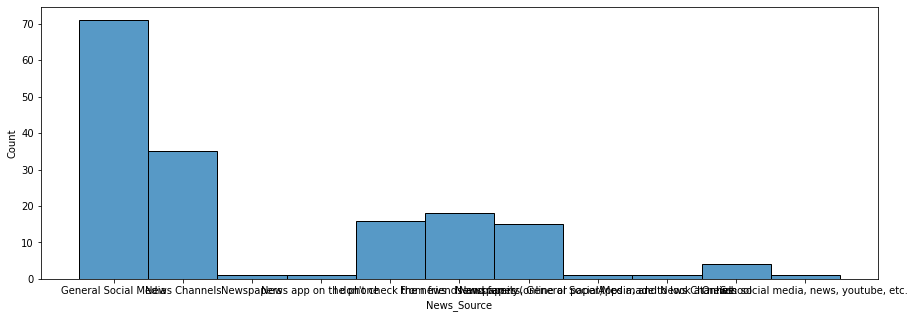

In [325]:
plt.figure(figsize=([15, 5]))
sns.histplot(dataset['News_Source'])

<AxesSubplot:xlabel='count', ylabel='News_Source'>

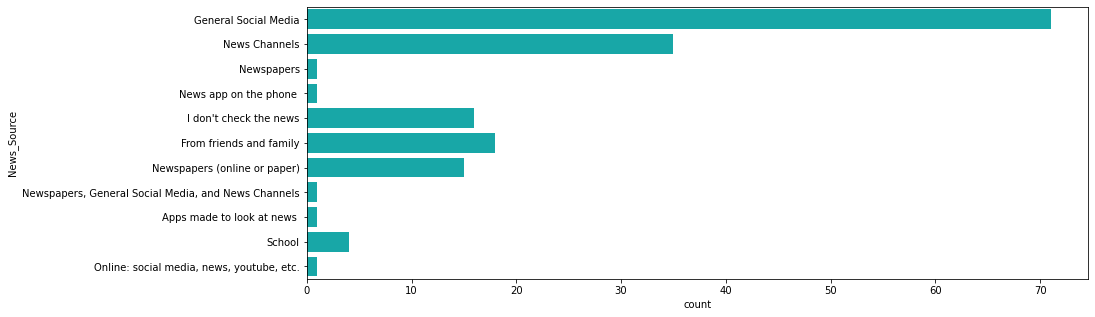

In [347]:
f, ax = plt.subplots(figsize=(14, 5))
sns.countplot(y="News_Source", data=dataset, color="c")

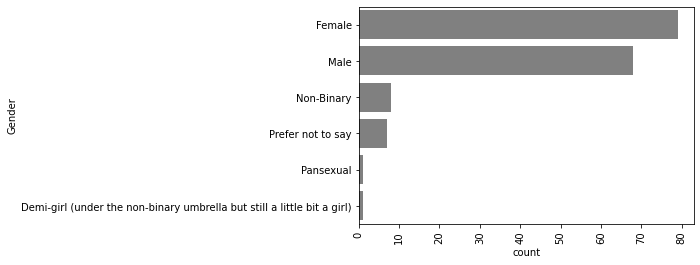

In [355]:
sns.countplot(data=dataset, y='Gender', color='grey', order = dataset['Gender'].value_counts().index)
plt.xticks(rotation = 90);

In [348]:
def univariate_pie(data):
    plt.figure(figsize=[15,5])
    return plt.pie(data.value_counts().values, labels=data.value_counts().index, startangle=90, autopct='%1.f%%');

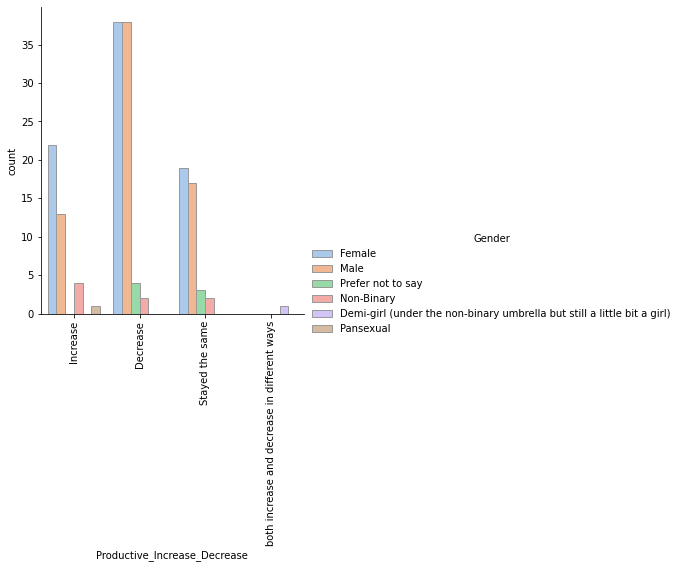

In [360]:
sns.catplot(x="Productive_Increase_Decrease", hue="Gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=dataset)
plt.xticks(rotation = 90);


In [361]:
pd.crosstab(dataset.Gender,dataset['Productive_Increase_Decrease'])

Productive_Increase_Decrease,Decrease,Increase,Stayed the same,both increase and decrease in different ways
Gender,,,,
Demi-girl (under the non-binary umbrella but still a little bit a girl),0,0,0,1
Female,38,22,19,0
Male,38,13,17,0
Non-Binary,2,4,2,0
Pansexual,0,1,0,0
Prefer not to say,4,0,3,0
